This file was used for exploring the data and trying to find corrilations and conclusions 
Appologies for the mess, the other file in this folder has the recommended model

In [91]:
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = """
    SELECT availability.number, FROM_UNIXTIME(availability.last_update / 1000) as last_update, availability.available_bike_stands, 
    availability.available_bikes, weather.* FROM dublinbikes.availability, dublinbikes.weather 
    WHERE availability.number = 2 AND availability.last_update > '2021-02-01' 
    and weather.dt = (select max(weather.dt) from dublinbikes.weather)
    """

df = pd.read_sql_query(sql, engine)
res_df = df.set_index('last_update').resample('w').mean()
res_df['last_update'] = res_df.index
return res_df.to_json(orient='records')

2021-04-02 09:40:19,534 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-02 09:40:19,536 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 09:40:19,632 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-02 09:40:19,633 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 09:40:19,825 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-02 09:40:19,826 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 09:40:20,016 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-02 09:40:20,017 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 09:40:20,115 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-02 09:40:20,116 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 09:40:20,211 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-02 09:40:20,212 INFO sqlalchemy.engine.base.E

SyntaxError: 'return' outside function (<ipython-input-91-90a1f54fb55a>, line 15)

In [6]:
df

,number,last_update,available_bike_stands,available_bikes,weather_description
0,2,2021-02-24 15:55:29,8,12,broken clouds
1,2,2021-02-24 16:18:01,9,11,broken clouds
2,2,2021-02-24 16:28:09,9,11,broken clouds
3,2,2021-02-24 16:38:17,9,11,broken clouds
4,2,2021-02-24 17:58:48,11,9,broken clouds
...,...,...,...,...,...
5248,2,2021-03-31 08:43:49,15,5,broken clouds
5249,2,2021-03-31 08:53:55,15,5,broken clouds
5250,2,2021-03-31 09:04:01,15,5,broken clouds
5251,2,2021-03-31 09:14:04,16,4,broken clouds


In [7]:
from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.*, 
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM dublinbikes.availability, dublinbikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(weather.dt)/(60*15))*(60*15))
   
    and availability.number = 2
    AND availability.last_update > '2021-02-01' 
    group by test1
    order by availability.last_update desc
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

df = pd.read_sql_query(sql, engine)

2021-04-02 10:34:31,550 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-02 10:34:31,551 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 10:34:31,861 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-02 10:34:31,863 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 10:34:32,047 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-02 10:34:32,048 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 10:34:32,231 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-02 10:34:32,232 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 10:34:32,463 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-02 10:34:32,464 INFO sqlalchemy.engine.base.Engine {}
2021-04-02 10:34:32,561 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-02 10:34:32,562 INFO sqlalchemy.engine.base.E

In [21]:
df[['available_bike_stands', 'available_bike_stands', 'weather_id', 
    'weather_main', 'weather_description', 'dt', 'wind_speed', 'main_temp', 
    'main_feels_like', 'main_temp_min', 'main_temp_max', 'weather_icon' ]].corr()

,available_bike_stands,available_bike_stands,weather_id,weather_main,weather_description,dt,wind_speed,main_temp,main_feels_like,main_temp_min,main_temp_max,weather_icon
available_bike_stands,1.000000,1.000000,-0.095661,0.100922,-0.006644,-0.260994,0.263435,0.053902,-0.162386,0.056784,0.037851,0.037395
available_bike_stands,1.000000,1.000000,-0.095661,0.100922,-0.006644,-0.260994,0.263435,0.053902,-0.162386,0.056784,0.037851,0.037395
weather_id,-0.095661,-0.095661,1.000000,-0.628841,-0.227399,0.017749,-0.067497,0.029341,0.100425,0.051154,0.013233,0.142132
weather_main,0.100922,0.100922,-0.628841,1.000000,0.165172,-0.062639,0.240589,0.064817,-0.074029,0.076989,0.053251,0.588740
weather_description,-0.006644,-0.006644,-0.227399,0.165172,1.000000,0.163904,0.099506,-0.066101,-0.090269,-0.074686,-0.055540,-0.216721
dt,-0.260994,-0.260994,0.017749,-0.062639,0.163904,1.000000,0.193742,0.136645,0.228305,0.112678,0.155032,-0.118485
wind_speed,0.263435,0.263435,-0.067497,0.240589,0.099506,0.193742,1.000000,0.147408,-0.273794,0.190947,0.093368,0.185402
main_temp,0.053902,0.053902,0.029341,0.064817,-0.066101,0.136645,0.147408,1.000000,0.878505,0.981670,0.986592,0.012036
main_feels_like,-0.162386,-0.162386,0.100425,-0.074029,-0.090269,0.228305,-0.273794,0.878505,1.000000,0.847133,0.887978,-0.066155
main_temp_min,0.056784,0.056784,0.051154,0.076989,-0.074686,0.112678,0.190947,0.981670,0.847133,1.000000,0.945988,0.059186


In [8]:
df 

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,...,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod,test1
0,2,14,6,-6.2672,53.344,803,Clouds,broken clouds,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:15:00
1,2,12,8,-6.2672,53.344,803,Clouds,broken clouds,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:00:00
2,2,12,8,-6.2672,53.344,803,Clouds,broken clouds,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:45:00
3,2,13,7,-6.2672,53.344,803,Clouds,broken clouds,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:30:00
4,2,11,9,-6.2672,53.344,803,Clouds,broken clouds,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2,14,6,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:15:00
1045,2,14,6,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:00:00
1046,2,13,7,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:45:00
1047,2,12,8,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:30:00


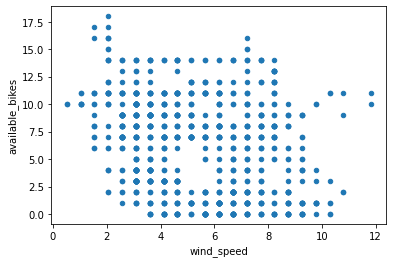

In [36]:
df[['wind_speed', 'available_bikes']].plot(kind='scatter', x='wind_speed',y='available_bikes' )

In [37]:
df[['wind_speed', 'available_bikes']]

,wind_speed,available_bikes
0,6.69,6
1,6.17,8
2,6.17,8
3,5.66,7
4,5.66,9
...,...,...
1044,3.09,6
1045,2.57,6
1046,2.57,7
1047,3.60,8


In [39]:
testsuffle=df[['available_bike_stands', 'available_bike_stands', 'weather_id', 'weather_main', 'weather_description', 'dt', 'wind_speed', 'main_temp', 'main_feels_like', 'main_temp_min', 'main_temp_max', 'weather_icon' ]]

In [41]:
testsuffle = testsuffle.sample(frac = 1)
testsuffle.corr()

,available_bike_stands,available_bike_stands,weather_id,weather_main,weather_description,dt,wind_speed,main_temp,main_feels_like,main_temp_min,main_temp_max,weather_icon
available_bike_stands,1.000000,1.000000,-0.095661,0.100922,-0.006644,-0.260994,0.263435,0.053902,-0.162386,0.056784,0.037851,0.037395
available_bike_stands,1.000000,1.000000,-0.095661,0.100922,-0.006644,-0.260994,0.263435,0.053902,-0.162386,0.056784,0.037851,0.037395
weather_id,-0.095661,-0.095661,1.000000,-0.628841,-0.227399,0.017749,-0.067497,0.029341,0.100425,0.051154,0.013233,0.142132
weather_main,0.100922,0.100922,-0.628841,1.000000,0.165172,-0.062639,0.240589,0.064817,-0.074029,0.076989,0.053251,0.588740
weather_description,-0.006644,-0.006644,-0.227399,0.165172,1.000000,0.163904,0.099506,-0.066101,-0.090269,-0.074686,-0.055540,-0.216721
dt,-0.260994,-0.260994,0.017749,-0.062639,0.163904,1.000000,0.193742,0.136645,0.228305,0.112678,0.155032,-0.118485
wind_speed,0.263435,0.263435,-0.067497,0.240589,0.099506,0.193742,1.000000,0.147408,-0.273794,0.190947,0.093368,0.185402
main_temp,0.053902,0.053902,0.029341,0.064817,-0.066101,0.136645,0.147408,1.000000,0.878505,0.981670,0.986592,0.012036
main_feels_like,-0.162386,-0.162386,0.100425,-0.074029,-0.090269,0.228305,-0.273794,0.878505,1.000000,0.847133,0.887978,-0.066155
main_temp_min,0.056784,0.056784,0.051154,0.076989,-0.074686,0.112678,0.190947,0.981670,0.847133,1.000000,0.945988,0.059186


In [20]:
df['weather_id'] = df['weather_id'].astype('category')  
df["weather_id"] = pd.Categorical(df["weather_id"]).codes
df.dtypes

df['weather_main'] = df['weather_main'].astype('category')  
df["weather_main"] = pd.Categorical(df["weather_main"]).codes

df['weather_description'] = df['weather_description'].astype('category')  
df["weather_description"] = pd.Categorical(df["weather_description"]).codes

df['dt'] = df['dt'].astype('category')  
df["dt"] = pd.Categorical(df["dt"]).codes


df['weather_icon'] = df['weather_icon'].astype('category')  
df["weather_icon"] = pd.Categorical(df["weather_icon"]).codes


df.dtypes

number                            int64
available_bike_stands             int64
available_bikes                   int64
coord_lon                       float64
coord_lat                       float64
weather_id                         int8
weather_main                       int8
weather_description                int8
weather_icon                       int8
base                             object
main_temp                       float64
main_feels_like                 float64
main_temp_min                   float64
main_temp_max                   float64
main_pressure                     int64
main_humidity                     int64
visibility                        int64
wind_speed                      float64
wind_deg                          int64
clouds_all                        int64
dt                                int16
sys_type                          int64
sys_id                            int64
sys_country                      object
sys_sunrise              datetime64[ns]


In [19]:
df

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,...,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod,test1
0,2,14,6,-6.2672,53.344,7,1,0,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:15:00
1,2,12,8,-6.2672,53.344,7,1,0,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:00:00
2,2,12,8,-6.2672,53.344,7,1,0,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:45:00
3,2,13,7,-6.2672,53.344,7,1,0,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:30:00
4,2,11,9,-6.2672,53.344,7,1,0,04d,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2,14,6,-6.2672,53.344,6,1,8,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:15:00
1045,2,14,6,-6.2672,53.344,6,1,8,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:00:00
1046,2,13,7,-6.2672,53.344,6,1,8,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:45:00
1047,2,12,8,-6.2672,53.344,6,1,8,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:30:00


In [28]:
df2=df.set_index('test1')
df3=df2.groupby(df2.index.hour).mean()
df3['hour'] = df3.index 

In [43]:
df3.corr()

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,main_temp,...,wind_speed,wind_deg,clouds_all,dt,sys_type,sys_id,timezone,id,cod,hour
number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available_bike_stands,NaN,1.000000,-0.999216,-0.362796,0.755521,0.082040,0.093779,0.083072,0.245739,-0.286518,...,-0.277153,-0.238501,0.247794,-0.013567,NaN,-0.195351,0.106229,NaN,NaN,0.036247
available_bikes,NaN,-0.999216,1.000000,0.355328,-0.744149,-0.094087,-0.107247,-0.095503,-0.233800,0.267911,...,0.261975,0.221099,-0.275389,0.004972,NaN,0.190006,-0.116773,NaN,NaN,-0.034957
coord_lon,NaN,-0.362796,0.355328,1.000000,-0.577350,-0.225135,0.258112,0.058175,0.078001,0.191299,...,0.162980,0.361425,0.209744,0.003643,NaN,0.248686,0.009364,NaN,NaN,-0.014744
coord_lat,NaN,0.755521,-0.744149,-0.577350,1.000000,0.081469,-0.204029,-0.223895,0.274510,-0.433015,...,-0.386643,-0.214811,-0.078447,-0.066041,NaN,-0.099977,0.041840,NaN,NaN,-0.025538
weather_id,NaN,0.082040,-0.094087,-0.225135,0.081469,1.000000,-0.648489,-0.160404,-0.042459,-0.330268,...,-0.335271,0.293240,0.481539,0.465926,NaN,0.011768,0.401520,NaN,NaN,-0.222761
weather_main,NaN,0.093779,-0.107247,0.258112,-0.204029,-0.648489,1.000000,0.687407,0.076263,0.637166,...,0.654287,-0.030661,0.288795,-0.309493,NaN,-0.103672,-0.139085,NaN,NaN,0.181286
weather_description,NaN,0.083072,-0.095503,0.058175,-0.223895,-0.160404,0.687407,1.000000,0.093589,0.490097,...,0.618239,0.123636,0.426143,-0.170354,NaN,-0.177510,-0.121634,NaN,NaN,0.124230
weather_icon,NaN,0.245739,-0.233800,0.078001,0.274510,-0.042459,0.076263,0.093589,1.000000,-0.420504,...,-0.312745,-0.066832,0.228880,0.129682,NaN,-0.207233,0.129117,NaN,NaN,-0.088403
main_temp,NaN,-0.286518,0.267911,0.191299,-0.433015,-0.330268,0.637166,0.490097,-0.420504,1.000000,...,0.934156,-0.070872,0.113787,-0.629742,NaN,0.083279,-0.439216,NaN,NaN,0.388562


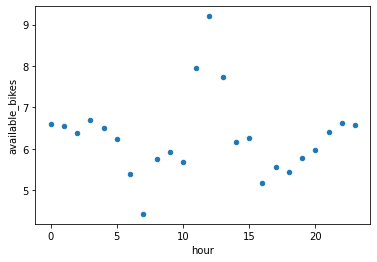

In [35]:
df3[['available_bikes', 'hour']].plot(kind='scatter', x='hour',y='available_bikes' )

In [22]:
df2

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,...,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod,test1
0,2,14,6,-6.2672,53.344,7,1,0,6,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:15:00
1,2,12,8,-6.2672,53.344,7,1,0,6,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 09:00:00
2,2,12,8,-6.2672,53.344,7,1,0,6,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:45:00
3,2,13,7,-6.2672,53.344,7,1,0,6,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:30:00
4,2,11,9,-6.2672,53.344,7,1,0,6,stations,...,1,1565,IE,2021-04-02 05:55:43,2021-04-02 19:01:08,3600,2964574,Dublin,200,2021-04-02 08:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2,14,6,-6.2672,53.344,6,1,8,4,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:15:00
1045,2,14,6,-6.2672,53.344,6,1,8,4,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:00:00
1046,2,13,7,-6.2672,53.344,6,1,8,4,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:45:00
1047,2,12,8,-6.2672,53.344,6,1,8,4,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:30:00


In [9]:
df['weather_id'] = df['weather_id'].astype('category')  

In [11]:
df["weather_id"] = pd.Categorical(df["weather_id"]).codes

In [12]:
df.dtypes

number                            int64
available_bike_stands             int64
available_bikes                   int64
coord_lon                       float64
coord_lat                       float64
weather_id                         int8
weather_main                     object
weather_description              object
weather_icon                     object
base                             object
main_temp                       float64
main_feels_like                 float64
main_temp_min                   float64
main_temp_max                   float64
main_pressure                     int64
main_humidity                     int64
visibility                        int64
wind_speed                      float64
wind_deg                          int64
clouds_all                        int64
dt                       datetime64[ns]
sys_type                          int64
sys_id                            int64
sys_country                      object
sys_sunrise              datetime64[ns]


In [68]:
df2=df.set_index('test1')

,number,available_bike_stands,available_bikes,weather_description
test1,,,,
2021-04-01 08:00:00,2,13,7,overcast clouds
2021-04-01 07:45:00,2,9,11,overcast clouds
2021-04-01 07:30:00,2,9,11,overcast clouds
2021-04-01 07:15:00,2,9,11,overcast clouds
2021-04-01 07:00:00,2,9,11,overcast clouds
2021-04-01 06:45:00,2,8,12,overcast clouds
2021-04-01 06:30:00,2,7,13,overcast clouds
2021-04-01 06:15:00,2,6,14,overcast clouds
2021-04-01 06:00:00,2,6,14,overcast clouds


In [67]:
df

,number,available_bike_stands,available_bikes,weather_description,test1
0,2,13,7,overcast clouds,2021-04-01 08:00:00
1,2,9,11,overcast clouds,2021-04-01 07:45:00
2,2,9,11,overcast clouds,2021-04-01 07:30:00
3,2,9,11,overcast clouds,2021-04-01 07:15:00
4,2,9,11,overcast clouds,2021-04-01 07:00:00
5,2,8,12,overcast clouds,2021-04-01 06:45:00
6,2,7,13,overcast clouds,2021-04-01 06:30:00
7,2,6,14,overcast clouds,2021-04-01 06:15:00
8,2,6,14,overcast clouds,2021-04-01 06:00:00
9,2,6,14,overcast clouds,2021-04-01 05:45:00


In [62]:
df2.mean()

number                    2.000000
available_bike_stands    14.606061
available_bikes           5.393939
dtype: float64

In [87]:
df2=df.set_index('test1')
x=df2.groupby(df2.index.hour).mean()
x['hour'] = x.index * 1.00
x.to_json(orient='records')

'[{"number":2.0,"available_bike_stands":19.0,"available_bikes":1.0,"hour":3.0},{"number":2.0,"available_bike_stands":19.25,"available_bikes":0.75,"hour":4.0},{"number":2.0,"available_bike_stands":14.0,"available_bikes":6.0,"hour":5.0},{"number":2.0,"available_bike_stands":11.1666666667,"available_bikes":8.8333333333,"hour":6.0},{"number":2.0,"available_bike_stands":10.4,"available_bikes":9.6,"hour":7.0},{"number":2.0,"available_bike_stands":15.6,"available_bikes":4.4,"hour":8.0},{"number":2.0,"available_bike_stands":18.0,"available_bikes":2.0,"hour":9.0},{"number":2.0,"available_bike_stands":19.0,"available_bikes":1.0,"hour":10.0}]'

In [86]:
x

,number,available_bike_stands,available_bikes,hour
test1,,,,
3,2.0,19.000000,1.000000,3.00
4,2.0,19.250000,0.750000,4.00
5,2.0,14.000000,6.000000,5.00
6,2.0,11.166667,8.833333,6.00
7,2.0,10.400000,9.600000,7.00
8,2.0,15.600000,4.400000,8.00
9,2.0,18.000000,2.000000,9.00
10,2.0,19.000000,1.000000,10.00


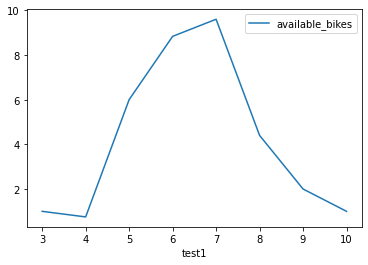

In [65]:
x.plot(y='available_bikes')

In [41]:
hourtest=df2.set_index('test1').resample('1h').mean()
hourtest

KeyError: "None of ['test1'] are in the columns"

In [39]:
hourtest

In [43]:
df.set_index('test1').resample('1h').mean()


,number,available_bike_stands,available_bikes
test1,,,
2021-03-21 18:00:00,2.0,12.00,8.00
2021-03-21 19:00:00,2.0,10.25,9.75
2021-03-21 20:00:00,2.0,9.75,10.25
2021-03-21 21:00:00,2.0,10.00,10.00
2021-03-21 22:00:00,2.0,9.00,11.00
...,...,...,...
2021-03-31 19:00:00,2.0,8.75,11.25
2021-03-31 20:00:00,2.0,6.75,13.25
2021-03-31 21:00:00,2.0,6.00,14.00


In [127]:


from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.*, 
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM dublinbikes.availability, dublinbikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(weather.dt)/(60*15))*(60*15))
   
    and availability.number = 2
    AND availability.last_update > '2021-02-01' 
    group by test1
    order by availability.last_update desc
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

dftest = pd.read_sql_query(sql, engine)

2021-04-03 13:04:45,063 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-03 13:04:45,063 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 13:04:45,348 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-03 13:04:45,348 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 13:04:45,561 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-03 13:04:45,561 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 13:04:45,747 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-03 13:04:45,747 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 13:04:46,184 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-03 13:04:46,184 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 13:04:46,278 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-03 13:04:46,278 INFO sqlalchemy.engine.base.E

In [128]:
dftest.head()

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,...,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod,test1
0,2,15,5,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-04-03 05:53:19,2021-04-03 19:02:56,3600,2964574,Dublin,200,2021-04-03 12:00:00
1,2,15,5,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-04-03 05:53:19,2021-04-03 19:02:56,3600,2964574,Dublin,200,2021-04-03 11:45:00
2,2,17,3,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-04-03 05:53:19,2021-04-03 19:02:56,3600,2964574,Dublin,200,2021-04-03 11:30:00
3,2,17,3,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-04-03 05:53:19,2021-04-03 19:02:56,3600,2964574,Dublin,200,2021-04-03 11:15:00
4,2,19,1,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-04-03 05:53:19,2021-04-03 19:02:56,3600,2964574,Dublin,200,2021-04-03 11:00:00


In [129]:
dftest['hour'] = 0
dftest['day'] = 0
for i in range (dftest.shape[0]):
    dftest.hour[i] = dftest.test1[i].hour+1
    dftest.day[i] = dftest.test1[i].weekday()+1

<ipython-input-129-25ce77c817c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest.hour[i] = dftest.test1[i].hour+1
<ipython-input-129-25ce77c817c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest.day[i] = dftest.test1[i].weekday()+1


In [108]:
dftest.groupby('hour').sum()

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,main_temp,main_feels_like,main_temp_min,main_temp_max,...,visibility,wind_speed,wind_deg,clouds_all,sys_type,sys_id,timezone,id,cod,day
hour,,,,,,,,,,,,,,,,,,,,,
1,98,667,313,-307.0928,2613.856,38892,13758.73,13549.85,13711.20,13805.42,...,479000,244.39,9010,2300,49,76685,75600,145264126,9800,193
2,96,656,304,-300.8256,2560.512,38189,13474.03,13284.12,13427.16,13516.85,...,480000,217.61,8460,2180,48,75120,86400,142299552,9600,192
3,94,650,290,-294.5584,2507.168,37697,13187.41,12998.46,13139.21,13230.96,...,470000,211.45,7650,2330,47,73555,82800,139334978,9400,188
4,98,663,317,-307.0928,2613.856,39007,13751.33,13545.46,13709.73,13792.78,...,490000,240.26,9750,2610,49,76691,90000,145264126,9800,193
5,96,658,302,-300.8256,2560.512,37910,13447.14,13250.92,13398.24,13492.88,...,480000,222.26,10260,2735,48,75120,86400,142299552,9600,192
6,96,672,288,-300.8256,2560.512,37313,13428.41,13235.36,13378.34,13477.30,...,480000,214.02,9290,2905,48,75120,86400,142299552,9600,192
7,94,696,244,-294.5584,2507.168,37718,13151.92,12965.24,13105.62,13198.35,...,463000,205.82,9990,2800,47,73564,86400,139334978,9400,186
8,96,753,206,-300.8256,2560.512,37917,13452.42,13271.78,13396.97,13501.73,...,477000,199.11,9710,2900,48,75120,86400,142299552,9600,192
9,98,711,265,-307.0928,2613.856,38115,13781.12,13586.38,13730.40,13826.02,...,490000,231.00,9020,2990,49,76685,90000,145264126,9800,193


In [93]:
dftest.test1[0].hour

10

In [69]:
#dftest=dftest.set_index('test1')
#dftest.groupby(dftest.index.hour).mean()
#dft2['hour'] = df3.index 
#df2.groupby(df2.index.hour).mean()
#x

AttributeError: 'RangeIndex' object has no attribute 'hour'

In [70]:
#ftest.groupby(dftest.index.hour).head()

AttributeError: 'RangeIndex' object has no attribute 'hour'

In [130]:
dftest['weather_main'] = dftest['weather_main'].astype('category')  
dftest["weather_main"] = pd.Categorical(dftest["weather_main"]).codes+1

In [121]:
dftest.groupby(['weather_main']).sum()

NameError: name 'dftest' is not defined

In [122]:
dftest

NameError: name 'dftest' is not defined

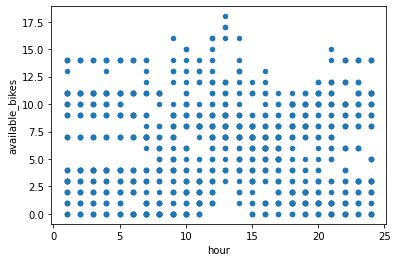

In [132]:
dftest[['available_bikes', 'hour']].plot(kind='scatter', x='hour',y='available_bikes' )

In [133]:
hourplot=dftest.groupby('hour').sum()
hourplot['hourtest'] = hourplot.index

#hourplot['hourtest'] = hourplot.index

#hourplot[['available_bikes', 'day']].plot(kind='scatter', x='day',y='available_bikes' )

In [134]:
hourplot['hourtest'] = hourplot.index

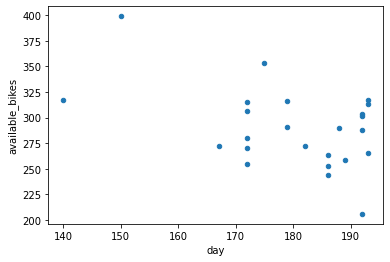

In [135]:
hourplot[['available_bikes', 'day']].plot(kind='scatter', x='day',y='available_bikes' )

In [136]:
hourplot

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,...,wind_speed,wind_deg,clouds_all,sys_type,sys_id,timezone,id,cod,day,hourtest
hour,,,,,,,,,,,,,,,,,,,,,
1,98,667,313,-307.0928,2613.856,38892,94.0,13758.73,13549.85,13711.20,...,244.39,9010,2300,49,76685,75600,145264126,9800,193,1
2,96,656,304,-300.8256,2560.512,38189,90.0,13474.03,13284.12,13427.16,...,217.61,8460,2180,48,75120,86400,142299552,9600,192,2
3,94,650,290,-294.5584,2507.168,37697,88.0,13187.41,12998.46,13139.21,...,211.45,7650,2330,47,73555,82800,139334978,9400,188,3
4,98,663,317,-307.0928,2613.856,39007,97.0,13751.33,13545.46,13709.73,...,240.26,9750,2610,49,76691,90000,145264126,9800,193,4
5,96,658,302,-300.8256,2560.512,37910,98.0,13447.14,13250.92,13398.24,...,222.26,10260,2735,48,75120,86400,142299552,9600,192,5
6,96,672,288,-300.8256,2560.512,37313,104.0,13428.41,13235.36,13378.34,...,214.02,9290,2905,48,75120,86400,142299552,9600,192,6
7,94,696,244,-294.5584,2507.168,37718,90.0,13151.92,12965.24,13105.62,...,205.82,9990,2800,47,73564,86400,139334978,9400,186,7
8,96,753,206,-300.8256,2560.512,37917,101.0,13452.42,13271.78,13396.97,...,199.11,9710,2900,48,75120,86400,142299552,9600,192,8
9,98,711,265,-307.0928,2613.856,38115,110.0,13781.12,13586.38,13730.40,...,231.00,9020,2990,49,76685,90000,145264126,9800,193,9


In [137]:
hourplot.corr()

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,...,wind_speed,wind_deg,clouds_all,sys_type,sys_id,timezone,id,cod,day,hourtest
number,1.000000,0.791210,-0.360802,-1.000000,1.000000,0.838355,0.450790,0.985879,0.989508,0.985013,...,0.170528,0.437286,0.463330,1.000000,0.999999,0.463062,1.000000,1.000000,0.717887,0.033349
available_bike_stands,0.791210,1.000000,-0.855157,-0.791210,0.791210,0.660942,0.447562,0.768924,0.772621,0.768140,...,0.066938,0.348660,0.496313,0.791210,0.791031,0.370636,0.791210,0.791210,0.705282,0.009472
available_bikes,-0.360802,-0.855157,1.000000,0.360802,-0.360802,-0.294667,-0.314876,-0.342670,-0.344810,-0.342136,...,0.021717,-0.164327,-0.393130,-0.360802,-0.360537,-0.191413,-0.360802,-0.360802,-0.456802,0.016177
coord_lon,-1.000000,-0.791210,0.360802,1.000000,-1.000000,-0.838355,-0.450790,-0.985879,-0.989508,-0.985013,...,-0.170528,-0.437286,-0.463330,-1.000000,-0.999999,-0.463062,-1.000000,-1.000000,-0.717887,-0.033349
coord_lat,1.000000,0.791210,-0.360802,-1.000000,1.000000,0.838355,0.450790,0.985879,0.989508,0.985013,...,0.170528,0.437286,0.463330,1.000000,0.999999,0.463062,1.000000,1.000000,0.717887,0.033349
weather_id,0.838355,0.660942,-0.294667,-0.838355,0.838355,1.000000,-0.076457,0.776308,0.787277,0.774239,...,-0.158312,0.456851,0.305534,0.838355,0.838396,0.433294,0.838355,0.838355,0.671295,-0.035156
weather_main,0.450790,0.447562,-0.314876,-0.450790,0.450790,-0.076457,1.000000,0.545566,0.530990,0.548291,...,0.678791,0.025882,0.503338,0.450790,0.450653,0.147796,0.450790,0.450790,0.143709,0.179913
main_temp,0.985879,0.768924,-0.342670,-0.985879,0.985879,0.776308,0.545566,1.000000,0.999559,0.999939,...,0.324688,0.365738,0.492261,0.985879,0.985893,0.418632,0.985879,0.985879,0.621370,0.099089
main_feels_like,0.989508,0.772621,-0.344810,-0.989508,0.989508,0.787277,0.530990,0.999559,1.000000,0.999293,...,0.297758,0.374487,0.489641,0.989508,0.989518,0.424944,0.989508,0.989508,0.632589,0.097130
main_temp_min,0.985013,0.768140,-0.342136,-0.985013,0.985013,0.774239,0.548291,0.999939,0.999293,1.000000,...,0.330242,0.360660,0.490812,0.985013,0.985026,0.414448,0.985013,0.985013,0.619042,0.100405


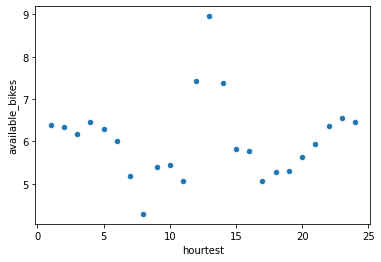

In [126]:
hourplot[['available_bikes', 'hourtest']].plot(kind='scatter', x='hourtest',y='available_bikes' )

In [ ]:
#Fresh Start

In [6]:


from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.weather_id, weather.weather_main, weather.main_temp, weather.main_feels_like, weather.main_temp_max, weather.main_temp_min, weather.main_pressure, weather.main_humidity, weather.wind_speed, weather.dt,
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM dublinbikes.availability, dublinbikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(weather.dt)/(60*15))*(60*15))
    AND availability.last_update > '2021-02-01' 
    limit 100000
     
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

firsttest = pd.read_sql_query(sql, engine)

2021-04-03 17:37:44,740 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-03 17:37:44,751 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 17:37:45,009 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-03 17:37:45,009 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 17:37:45,188 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-03 17:37:45,193 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 17:37:45,372 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-03 17:37:45,373 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 17:37:45,581 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-03 17:37:45,581 INFO sqlalchemy.engine.base.Engine {}
2021-04-03 17:37:45,671 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-03 17:37:45,671 INFO sqlalchemy.engine.base.E

In [7]:
firsttest.head()

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt,test1
0,2,13,7,802,Clouds,284.35,280.55,284.82,283.71,1030,62,3.6,2021-03-21 14:20:24,2021-03-21 14:15:00
1,2,12,8,802,Clouds,284.44,280.65,284.82,283.71,1030,62,3.6,2021-03-21 14:35:01,2021-03-21 14:30:00
2,2,12,8,802,Clouds,284.35,280.55,284.82,283.71,1030,62,3.6,2021-03-21 14:26:37,2021-03-21 14:30:00
3,2,13,7,802,Clouds,284.44,280.65,284.82,283.71,1030,62,3.6,2021-03-21 14:35:01,2021-03-21 14:30:00
4,2,13,7,802,Clouds,284.35,280.55,284.82,283.71,1030,62,3.6,2021-03-21 14:26:37,2021-03-21 14:30:00


In [8]:
firsttest['weather_main'] = firsttest['weather_main'].astype('category')  
firsttest["weather_main"] = pd.Categorical(firsttest["weather_main"]).codes+1
firsttest['hour'] = 0
firsttest['day'] = 0
for i in range (firsttest.shape[0]):
    firsttest.hour[i] = firsttest.test1[i].hour+1
    firsttest.day[i] = firsttest.test1[i].weekday()+1

<ipython-input-8-b0ab75cbc362>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsttest.hour[i] = firsttest.test1[i].hour+1
<ipython-input-8-b0ab75cbc362>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firsttest.day[i] = firsttest.test1[i].weekday()+1


In [35]:
firsttest.corr(method='pearson', min_periods=100)

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,hour,day
number,1.000000,0.103204,0.083564,-0.001818,0.002875,0.014817,0.011510,0.014497,0.014793,-0.005133,0.003006,0.012123,0.001486,0.004751
available_bike_stands,0.103204,1.000000,-0.521805,0.003508,-0.005484,0.006439,-0.027219,0.002622,0.008418,-0.139716,0.113917,0.091985,-0.046239,0.131962
available_bikes,0.083564,-0.521805,1.000000,0.000049,0.005241,0.004415,0.047286,0.009321,0.001744,0.180387,-0.148707,-0.113418,0.064063,-0.169401
weather_id,-0.001818,0.003508,0.000049,1.000000,-0.914672,-0.043294,0.061528,-0.043388,-0.042677,0.172273,0.104198,-0.192545,-0.037488,-0.102166
weather_main,0.002875,-0.005484,0.005241,-0.914672,1.000000,0.085956,-0.043942,0.085017,0.089521,-0.168003,-0.165074,0.246130,0.107798,0.108054
main_temp,0.014817,0.006439,0.004415,-0.043294,0.085956,1.000000,0.893599,0.993036,0.990231,0.068262,-0.185470,0.487876,0.171980,-0.083336
main_feels_like,0.011510,-0.027219,0.047286,0.061528,-0.043942,0.893599,1.000000,0.889458,0.886907,0.379310,-0.083715,0.054533,0.105061,-0.227671
main_temp_max,0.014497,0.002622,0.009321,-0.043388,0.085017,0.993036,0.889458,1.000000,0.972362,0.070890,-0.191861,0.478602,0.176537,-0.065543
main_temp_min,0.014793,0.008418,0.001744,-0.042677,0.089521,0.990231,0.886907,0.972362,1.000000,0.079082,-0.182716,0.479463,0.183987,-0.104363
main_pressure,-0.005133,-0.139716,0.180387,0.172273,-0.168003,0.068262,0.379310,0.070890,0.079082,1.000000,-0.202902,-0.632545,0.019411,-0.414752


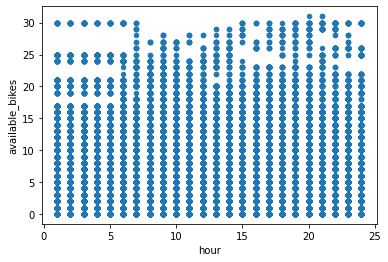

In [11]:
firsttest[['available_bikes', 'hour']].plot(kind='scatter', x='hour',y='available_bikes' )

In [125]:
firsttest['main_pressure'].value_counts()

1016    10771
1015     7574
1014     6845
1013     5840
1008     5160
1010     5009
1026     4791
1012     4776
1009     4290
1017     3869
1002     3746
1007     3547
1024     3337
1018     3318
1011     2583
1028     2579
1001     2362
1029     2292
1020     1396
1006     1380
1003     1378
1030     1284
1005     1216
999      1213
1027     1207
1023     1171
1004     1110
1025     1054
1021     1037
1022      908
1000      862
1019      860
998       689
997       546
Name: main_pressure, dtype: int64

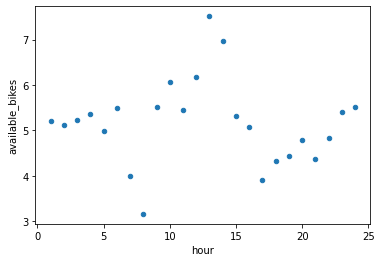

In [23]:
filt = (firsttest['number'] == 2)
hourgraph=firsttest.loc[filt].groupby('hour').mean()
hourgraph['hour']=hourgraph.index
hourgraph.plot(kind='scatter', x='hour',y='available_bikes' )

In [28]:
hourgraph.corr(method='spearman')

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,day,hour
number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available_bike_stands,NaN,1.000000,-0.993043,-0.042609,0.013916,-0.297391,-0.304348,-0.307826,-0.269565,-0.397391,-0.004348,-0.231304,0.607826,0.113043
available_bikes,NaN,-0.993043,1.000000,0.082609,-0.063057,0.248696,0.248696,0.257391,0.227826,0.393913,0.063478,0.194783,-0.572174,-0.095652
weather_id,NaN,-0.042609,0.082609,1.000000,-0.924549,-0.406957,-0.367826,-0.448696,-0.357391,0.119130,0.520870,-0.450435,0.052174,-0.085217
weather_main,NaN,0.013916,-0.063057,-0.924549,1.000000,0.599696,0.574473,0.639269,0.548380,0.113068,-0.672320,0.549685,-0.094803,0.360513
main_temp,NaN,-0.297391,0.248696,-0.406957,0.599696,1.000000,0.973043,0.993043,0.987826,0.463478,-0.827826,0.847826,-0.388696,0.460000
main_feels_like,NaN,-0.304348,0.248696,-0.367826,0.574473,0.973043,1.000000,0.963478,0.953043,0.513043,-0.818261,0.756522,-0.449565,0.429565
main_temp_max,NaN,-0.307826,0.257391,-0.448696,0.639269,0.993043,0.963478,1.000000,0.973043,0.472174,-0.829565,0.854783,-0.395652,0.449565
main_temp_min,NaN,-0.269565,0.227826,-0.357391,0.548380,0.987826,0.953043,0.973043,1.000000,0.459130,-0.801739,0.874783,-0.333043,0.476522
main_pressure,NaN,-0.397391,0.393913,0.119130,0.113068,0.463478,0.513043,0.472174,0.459130,1.000000,-0.230435,0.185217,-0.347826,0.449565


In [36]:
# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [42]:
x = firsttest.drop(['available_bikes', 'available_bike_stands', 'test1'], axis=1)
y = firsttest['available_bikes']

In [44]:
x

,number,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,dt,test1,hour,day
0,2,802,2,284.35,280.55,284.82,283.71,1030,62,3.60,2021-03-21 14:20:24,2021-03-21 14:15:00,15,7
1,2,802,2,284.44,280.65,284.82,283.71,1030,62,3.60,2021-03-21 14:35:01,2021-03-21 14:30:00,15,7
2,2,802,2,284.35,280.55,284.82,283.71,1030,62,3.60,2021-03-21 14:26:37,2021-03-21 14:30:00,15,7
3,2,802,2,284.44,280.65,284.82,283.71,1030,62,3.60,2021-03-21 14:35:01,2021-03-21 14:30:00,15,7
4,2,802,2,284.35,280.55,284.82,283.71,1030,62,3.60,2021-03-21 14:26:37,2021-03-21 14:30:00,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,40,803,2,288.54,283.21,289.26,287.15,1017,77,8.23,2021-03-29 11:19:27,2021-03-29 11:15:00,12,1
99996,40,803,2,288.37,282.99,289.26,287.15,1017,77,8.23,2021-03-29 11:16:22,2021-03-29 11:15:00,12,1
99997,40,803,2,288.37,282.99,289.26,287.15,1017,77,8.23,2021-03-29 11:16:07,2021-03-29 11:15:00,12,1
99998,40,803,2,288.73,283.46,289.82,287.15,1017,77,8.23,2021-03-29 11:33:22,2021-03-29 11:30:00,12,1


In [51]:
cont_features=['main_feels_like','weather_main','wind_speed','hour', 'day' ]
linreg = LinearRegression().fit(x[cont_features], y)

# Print the weights learned for each feature.
print("Features: \n", cont_features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)

Features: 
 ['main_feels_like', 'weather_main', 'wind_speed', 'hour', 'day']
Coeficients: 
 [ 0.01516378  0.33439084 -0.21940194  0.07408666 -0.40125729]

Intercept: 
 4.283671327245397


In [53]:
linreg_predictions = linreg.predict(x[cont_features])

print("\nPredictions with linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with linear regression: 

       available_bikes  Predicted
0                    7   6.719302
1                    8   6.720819
2                    8   6.719302
3                    7   6.720819
4                    7   6.719302
...                ...        ...
99995                2   7.929091
99996                2   7.925755
99997                2   7.925755
99998                2   7.932882
99999                2   7.932882

[100000 rows x 2 columns]


In [54]:
actual_vs_predicted_linreg

,available_bikes,Predicted
0,7,6.719302
1,8,6.720819
2,8,6.719302
3,7,6.720819
4,7,6.719302
...,...,...
99995,2,7.929091
99996,2,7.925755
99997,2,7.925755
99998,2,7.932882


In [55]:
prediction_errors = y - linreg_predictions
print("Actual - Predicted:\n", prediction_errors)
print("\n(Actual - Predicted) squared:\n", prediction_errors**2)
print("\n Sum of (Actual - Predicted) squared:\n", (prediction_errors**2).sum())

Actual - Predicted:
 0        0.280698
1        1.279181
2        1.280698
3        0.279181
4        0.280698
           ...   
99995   -5.929091
99996   -5.925755
99997   -5.925755
99998   -5.932882
99999   -5.932882
Name: available_bikes, Length: 100000, dtype: float64

(Actual - Predicted) squared:
 0         0.078791
1         1.636304
2         1.640186
3         0.077942
4         0.078791
           ...    
99995    35.154119
99996    35.114571
99997    35.114571
99998    35.199087
99999    35.199087
Name: available_bikes, Length: 100000, dtype: float64

 Sum of (Actual - Predicted) squared:
 2898596.6722734473


In [56]:
# Print the Mean Squared Error of the model on the training set
mse = (prediction_errors** 2).mean()
rmse = ((prediction_errors** 2).mean())**0.5

print("\nMean Squared Error:\n", mse)
print("\nRoot Mean Squared Error:\n", rmse)


Mean Squared Error:
 28.98596672273424

Root Mean Squared Error:
 5.383861692385331


In [58]:
import numpy as np

In [60]:
print("|Actual - Predicted|:\n", abs(prediction_errors))

|Actual - Predicted|:
 0        0.280698
1        1.279181
2        1.280698
3        0.279181
4        0.280698
           ...   
99995    5.929091
99996    5.925755
99997    5.925755
99998    5.932882
99999    5.932882
Name: available_bikes, Length: 100000, dtype: float64


In [61]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(prediction_errors).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 4.318273040455301


In [63]:
# Print the R2 of the model on the training set
#Pair the actual and the predicted values
#This can be done directly with sklearn functions, 
#but below is a manual example to understand how it works

prediction_errors = y - linreg_predictions
print("Actual - Predicted:\n", prediction_errors)
print("\n(Actual - Predicted) squared:\n", prediction_errors**2)
print("\n Sum of squared errors:\n", sum(prediction_errors**2))

avg_predictions =np.ones(y.shape[0])* firsttest.available_bikes.mean()

print("\nAverageModelPredictions:\n", avg_predictions)
avgpredictions_errors = y - avg_predictions
print("Actual - AvgPredictions:\n", avgpredictions_errors)
print("\n(Actual - AvgPredictions) squared:\n", avgpredictions_errors**2)
print("\n Total sum of squared errors:\n", sum(avgpredictions_errors**2))

r2 = 1 - sum(prediction_errors**2)/sum(avgpredictions_errors**2)
print("\n R2:\n", r2)


Actual - Predicted:
 0        0.280698
1        1.279181
2        1.280698
3        0.279181
4        0.280698
           ...   
99995   -5.929091
99996   -5.925755
99997   -5.925755
99998   -5.932882
99999   -5.932882
Name: available_bikes, Length: 100000, dtype: float64

(Actual - Predicted) squared:
 0         0.078791
1         1.636304
2         1.640186
3         0.077942
4         0.078791
           ...    
99995    35.154119
99996    35.114571
99997    35.114571
99998    35.199087
99999    35.199087
Name: available_bikes, Length: 100000, dtype: float64

 Sum of squared errors:
 2898596.672273424

AverageModelPredictions:
 [7.29309 7.29309 7.29309 ... 7.29309 7.29309 7.29309]
Actual - AvgPredictions:
 0       -0.29309
1        0.70691
2        0.70691
3       -0.29309
4       -0.29309
          ...   
99995   -5.29309
99996   -5.29309
99997   -5.29309
99998   -5.29309
99999   -5.29309
Name: available_bikes, Length: 100000, dtype: float64

(Actual - AvgPredictions) squared:
 0  

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [68]:
y

0        7
1        8
2        8
3        7
4        7
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: available_bikes, Length: 100000, dtype: int64

In [73]:
rfc = RandomForestRegressor(
                           random_state=0
                           )
rfc = rfc.fit(xtrain,y)
score = rfc.score(xtrain,y)
# score = cross_val_score(rfc,Xtest,Ytest,cv=10)
score

TypeError: invalid type promotion

In [113]:
xtrain = firsttest.drop(['available_bikes', 'available_bike_stands', 'test1', 'dt', 'number'], axis=1)
ytrain = firsttest[['available_bikes']]

xtrain = xtrain.sample(frac=1)
xtrain = xtrain.sample(frac=1)

,available_bikes
0,7
1,8
2,8
3,7
4,7
...,...
99995,2
99996,2
99997,2
99998,2


In [114]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
prediction = model.fit(xtrain, ytrain)

<ipython-input-114-ddb532052e2c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  prediction = model.fit(xtrain, ytrain)


In [115]:
model.oob_score_

0.09926089832150164

In [116]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [117]:
test_prediction = model.predict(xtrain)
printMetrics(ytrain, test_prediction)


MAE:  4.064226288741159
RMSE:  5.164459104795652
R2:  0.11972027558871667


In [118]:
model.feature_importances_

array([0.00393454, 0.00136958, 0.0850834 , 0.06547077, 0.02286836,
       0.01207675, 0.33602034, 0.02432823, 0.02812544, 0.25667892,
       0.16404365])

In [119]:
feature_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
feature_importances

weather_id         0.003935
weather_main       0.001370
main_temp          0.085083
main_feels_like    0.065471
main_temp_max      0.022868
main_temp_min      0.012077
main_pressure      0.336020
main_humidity      0.024328
wind_speed         0.028125
hour               0.256679
day                0.164044
dtype: float64

In [1]:
from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.*, 
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM dublinbikes.availability, dublinbikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(weather.dt)/(60*15))*(60*15))
   
    and availability.number = 2
    AND availability.last_update > '2021-02-01' 
    group by test1
    order by availability.last_update desc
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

randomvartest = pd.read_sql_query(sql, engine)

2021-04-04 16:25:09,067 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-04 16:25:09,072 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:25:09,166 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-04 16:25:09,171 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:25:09,368 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-04 16:25:09,368 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:25:09,547 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-04 16:25:09,552 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:25:09,758 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-04 16:25:09,758 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:25:09,848 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-04 16:25:09,848 INFO sqlalchemy.engine.base.E

In [2]:
randomvartest

,number,available_bike_stands,available_bikes,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,...,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod,test1
0,2,20,0,-6.2672,53.344,801,Clouds,few clouds,02d,stations,...,1,1565,IE,2021-04-04 05:50:55,2021-04-04 19:04:44,3600,2964574,Dublin,200,2021-04-04 15:00:00
1,2,20,0,-6.2672,53.344,801,Clouds,few clouds,02d,stations,...,1,1565,IE,2021-04-04 05:50:55,2021-04-04 19:04:44,3600,2964574,Dublin,200,2021-04-04 14:45:00
2,2,19,1,-6.2672,53.344,801,Clouds,few clouds,02d,stations,...,1,1565,IE,2021-04-04 05:50:55,2021-04-04 19:04:44,3600,2964574,Dublin,200,2021-04-04 14:30:00
3,2,19,1,-6.2672,53.344,801,Clouds,few clouds,02d,stations,...,1,1565,IE,2021-04-04 05:50:55,2021-04-04 19:04:44,3600,2964574,Dublin,200,2021-04-04 14:15:00
4,2,19,1,-6.2672,53.344,801,Clouds,few clouds,02d,stations,...,1,1565,IE,2021-04-04 05:50:55,2021-04-04 19:04:44,3600,2964574,Dublin,200,2021-04-04 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,2,14,6,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:15:00
1260,2,14,6,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 15:00:00
1261,2,13,7,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:45:00
1262,2,12,8,-6.2672,53.344,802,Clouds,scattered clouds,03d,stations,...,1,1565,IE,2021-03-21 06:24:53,2021-03-21 18:39:29,0,2964574,Dublin,200,2021-03-21 14:30:00


In [5]:
randomvartest['weather_main'] = randomvartest['weather_main'].astype('category')  
randomvartest["weather_main"] = pd.Categorical(randomvartest["weather_main"]).codes+1
randomvartest['hour'] = 0
randomvartest['day'] = 0
for i in range (randomvartest.shape[0]):
    randomvartest.hour[i] = randomvartest.test1[i].hour+1
    randomvartest.day[i] = randomvartest.test1[i].weekday()+1
    
randomvartest = randomvartest.drop(['base', 'sys_id','sys_type',  'sys_country', 'sys_sunrise', 'sys_sunset', 'timezone', 'id', 'name', 'cod' ], axis=1)

<ipython-input-5-5711fe91d81e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomvartest.hour[i] = randomvartest.test1[i].hour+1
<ipython-input-5-5711fe91d81e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  randomvartest.day[i] = randomvartest.test1[i].weekday()+1


In [6]:
randomvartest = randomvartest.drop(['base', 'sys_id','sys_type',  'sys_country', 'sys_sunrise', 'sys_sunset', 'timezone', 'id', 'name', 'cod' ], axis=1)



KeyError: "['base' 'sys_id' 'sys_type' 'sys_country' 'sys_sunrise' 'sys_sunset'\n 'timezone' 'id' 'name' 'cod'] not found in axis"

In [7]:
randomvartest = randomvartest.drop(['coord_lon', 'coord_lat',  ], axis=1)

In [8]:
rainfilt = (randomvartest['hour'] == 15)

randomvartest.loc[rainfilt].describe()




,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,visibility,wind_speed,wind_deg,clouds_all,hour,day
count,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.0,56.000000,56.000000,56.000000,56.0,56.0000
mean,2.0,14.660714,5.267857,780.589286,2.214286,284.732679,280.434464,283.860714,285.415714,1020.339286,67.25000,10000.0,6.237857,178.750000,50.892857,15.0,4.0000
std,0.0,3.105870,3.136246,78.461751,0.779610,2.672419,3.726471,2.558392,2.812652,9.289832,7.93439,0.0,2.272449,79.499857,26.235076,0.0,2.0181
min,2.0,8.000000,0.000000,500.000000,2.000000,280.250000,273.380000,279.150000,280.930000,1001.000000,57.00000,10000.0,2.570000,40.000000,20.000000,15.0,1.0000
25%,2.0,12.750000,3.000000,801.000000,2.000000,282.320000,277.690000,282.040000,283.150000,1014.750000,62.00000,10000.0,4.120000,97.500000,20.000000,15.0,2.0000
50%,2.0,14.000000,6.000000,802.000000,2.000000,284.655000,279.440000,283.710000,285.370000,1018.000000,65.50000,10000.0,6.690000,200.000000,40.000000,15.0,4.0000
75%,2.0,17.000000,7.250000,803.000000,2.000000,286.530000,283.542500,285.930000,287.040000,1027.000000,72.00000,10000.0,8.230000,222.500000,75.000000,15.0,6.0000
max,2.0,20.000000,12.000000,804.000000,5.000000,289.750000,287.130000,289.150000,290.930000,1035.000000,87.00000,10000.0,10.290000,330.000000,90.000000,15.0,7.0000


In [9]:
randomvartest.corr()

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,visibility,wind_speed,wind_deg,clouds_all,hour,day
number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available_bike_stands,NaN,1.000000,-0.999315,-0.091587,0.063902,0.029295,-0.082920,0.019532,0.036512,-0.202423,-0.146221,0.155010,0.178378,0.255073,-0.106031,0.014580,0.229373
available_bikes,NaN,-0.999315,1.000000,0.097072,-0.069557,-0.032397,0.082376,-0.022136,-0.039699,0.205409,0.153542,-0.156140,-0.180355,-0.258582,0.109616,-0.014176,-0.227001
weather_id,NaN,-0.091587,0.097072,1.000000,-0.892650,-0.048133,0.088449,-0.056468,-0.033163,0.227452,0.105485,0.041885,-0.216007,-0.082283,-0.117999,-0.026978,-0.051140
weather_main,NaN,0.063902,-0.069557,-0.892650,1.000000,0.115822,-0.041393,0.137617,0.085555,-0.255280,-0.161089,-0.118929,0.255312,0.095832,0.308655,0.048276,0.013670
main_temp,NaN,0.029295,-0.032397,-0.048133,0.115822,1.000000,0.859661,0.979500,0.970003,-0.138610,-0.443258,-0.014831,0.320813,0.002212,0.253690,0.215535,-0.381028
main_feels_like,NaN,-0.082920,0.082376,0.088449,-0.041393,0.859661,1.000000,0.810439,0.881132,0.243203,-0.245769,-0.063688,-0.116721,-0.163701,0.069291,0.194899,-0.329842
main_temp_min,NaN,0.019532,-0.022136,-0.056468,0.137617,0.979500,0.810439,1.000000,0.913097,-0.175940,-0.477685,-0.002487,0.375275,-0.007572,0.317207,0.207215,-0.396448
main_temp_max,NaN,0.036512,-0.039699,-0.033163,0.085555,0.970003,0.881132,0.913097,1.000000,-0.059063,-0.370149,-0.028447,0.228136,0.000857,0.162397,0.217849,-0.339912
main_pressure,NaN,-0.202423,0.205409,0.227452,-0.255280,-0.138610,0.243203,-0.175940,-0.059063,1.000000,0.140027,0.010320,-0.521293,-0.426559,-0.271851,0.002268,0.040882


In [10]:
randomvartest.loc[rainfilt]

,number,available_bike_stands,available_bikes,weather_id,weather_main,weather_description,weather_icon,main_temp,main_feels_like,main_temp_min,...,main_pressure,main_humidity,visibility,wind_speed,wind_deg,clouds_all,dt,test1,hour,day
1,2,20,0,801,2,few clouds,02d,286.43,285.33,285.93,...,1024,58,10000,9.26,290,20,2021-04-04 14:50:05,2021-04-04 14:45:00,15,7
2,2,19,1,801,2,few clouds,02d,286.53,285.54,285.93,...,1025,62,10000,8.23,290,20,2021-04-04 14:32:40,2021-04-04 14:30:00,15,7
3,2,19,1,801,2,few clouds,02d,286.53,285.54,285.93,...,1025,62,10000,7.20,270,20,2021-04-04 14:15:03,2021-04-04 14:15:00,15,7
4,2,19,1,801,2,few clouds,02d,286.53,285.54,285.93,...,1025,62,10000,7.20,270,20,2021-04-04 14:05:02,2021-04-04 14:00:00,15,7
97,2,16,4,801,2,few clouds,02d,283.85,282.59,282.59,...,1035,62,10000,4.12,70,20,2021-04-03 14:52:22,2021-04-03 14:45:00,15,6
98,2,17,3,801,2,few clouds,02d,283.93,282.68,282.59,...,1035,62,10000,3.09,80,20,2021-04-03 14:27:33,2021-04-03 14:30:00,15,6
99,2,16,4,801,2,few clouds,02d,283.93,282.68,282.59,...,1035,62,10000,3.09,80,20,2021-04-03 14:17:32,2021-04-03 14:15:00,15,6
100,2,19,1,801,2,few clouds,02d,283.88,280.35,282.59,...,1035,62,10000,3.09,60,20,2021-04-03 14:00:09,2021-04-03 14:00:00,15,6
193,2,20,0,801,2,few clouds,02d,282.27,279.58,282.04,...,1034,61,10000,5.14,50,20,2021-04-02 14:43:17,2021-04-02 14:45:00,15,5
194,2,17,3,801,2,few clouds,02d,282.04,279.30,280.93,...,1034,61,10000,5.14,40,20,2021-04-02 14:37:21,2021-04-02 14:30:00,15,5


In [190]:
randomvartest.groupby('hour').mean()

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,visibility,wind_speed,wind_deg,clouds_all,day
hour,,,,,,,,,,,,,,,,
1,2.0,13.641509,6.358491,794.264151,1.924528,280.463019,276.446038,279.316981,281.514340,1019.981132,86.132075,9792.452830,4.717736,191.132075,44.905660,4.169811
2,2.0,13.692308,6.307692,796.019231,1.884615,280.337500,276.564615,279.258462,281.357115,1020.038462,85.480769,10000.000000,4.323462,183.653846,43.461538,4.230769
3,2.0,13.843137,6.156863,801.980392,1.882353,280.177059,276.354706,279.035490,281.268235,1019.666667,84.647059,10000.000000,4.266863,172.745098,47.254902,4.235294
4,2.0,13.566038,6.433962,796.433962,1.981132,280.223019,276.200000,279.270377,281.265283,1019.415094,84.264151,10000.000000,4.668868,204.150943,50.754717,4.169811
5,2.0,13.730769,6.269231,790.653846,2.038462,279.745962,275.790385,278.670000,280.917692,1019.500000,84.596154,10000.000000,4.442500,217.115385,54.134615,4.230769
6,2.0,14.038462,5.961538,779.173077,2.153846,279.427692,275.540577,278.328077,280.618077,1019.711538,85.000000,10000.000000,4.284038,198.076923,57.403846,4.230769
7,2.0,14.823529,5.176471,802.392157,1.921569,279.498627,275.628039,278.514118,280.450000,1019.980392,83.372549,9862.745098,4.227255,210.784314,56.470588,4.196078
8,2.0,15.634615,4.346154,790.730769,2.038462,280.088846,276.391538,278.906346,281.108846,1020.173077,82.423077,9942.307692,4.106154,206.538462,56.153846,4.230769
9,2.0,14.547170,5.377358,779.528302,2.150943,281.227547,277.347170,280.071509,282.185472,1020.320755,81.566038,10000.000000,4.698302,189.622642,56.415094,4.169811


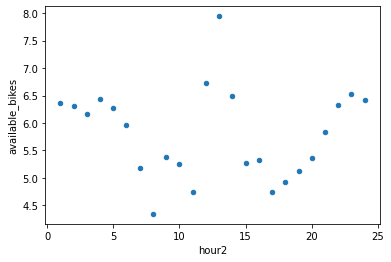

In [14]:
testgraph=randomvartest.groupby('hour').mean()
testgraph['hour2']=testgraph.index
testgraph.plot(kind='scatter', x='hour2',y='available_bikes' )

In [21]:
sortedval=testgraph.sort_values(by=['available_bikes'])


In [26]:
sortedval['busiest'] = 0
for i in range (1, 24):
    sortedval.busiest[i] = i
    

<ipython-input-26-627f37f1619a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sortedval.busiest[i] = i


In [27]:
sortedval

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_min,main_temp_max,main_pressure,main_humidity,visibility,wind_speed,wind_deg,clouds_all,day,hour2,busiest
hour,,,,,,,,,,,,,,,,,,
8,2.0,15.634615,4.346154,790.730769,2.038462,280.088846,276.391538,278.906346,281.108846,1020.173077,82.423077,9942.307692,4.106154,206.538462,56.153846,4.230769,8,8
17,2.0,15.259259,4.740741,740.555556,2.611111,284.247593,279.885556,283.362407,285.026296,1019.240741,69.314815,10000.000000,5.955370,164.074074,51.388889,3.888889,17,17
11,2.0,15.181818,4.745455,797.109091,2.036364,283.132909,279.075455,281.985636,284.023636,1020.545455,75.145455,10000.000000,5.481273,196.545455,62.272727,3.945455,11,11
18,2.0,15.074074,4.925926,774.240741,2.277778,283.712963,279.437037,282.761296,284.590926,1019.203704,71.111111,9962.962963,5.621296,164.814815,53.333333,3.888889,18,18
19,2.0,14.865385,5.134615,790.615385,2.115385,282.709423,278.402115,281.857692,283.587885,1019.653846,73.346154,9980.769231,5.411731,164.230769,51.826923,3.769231,19,19
7,2.0,14.823529,5.176471,802.392157,1.921569,279.498627,275.628039,278.514118,280.450000,1019.980392,83.372549,9862.745098,4.227255,210.784314,56.470588,4.196078,7,7
10,2.0,14.666667,5.259259,802.537037,1.925926,282.257963,278.280000,281.120556,283.167593,1020.611111,79.555556,10000.000000,5.192593,193.518519,59.814815,3.888889,10,10
15,2.0,14.660714,5.267857,780.589286,2.214286,284.732679,280.434464,283.860714,285.415714,1020.339286,67.250000,10000.000000,6.237857,178.750000,50.892857,4.000000,15,15
16,2.0,14.653846,5.326923,784.750000,2.173077,284.587115,280.376923,283.693077,285.346154,1020.423077,68.403846,10000.000000,5.946923,175.192308,51.826923,3.807692,16,16


In [ ]:
hourgraph=firsttest.loc[filt].groupby('hour').mean()
hourgraph['hour']=hourgraph.index
hourgraph.plot(kind='scatter', x='hour',y='available_bikes' )

In [1]:
from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine(
        "mysql+pymysql://{}:{}@{}:{}/{}".format(rds_config.USERNAME, rds_config.PSSWRD, rds_config.HOST,
                                                rds_config.DBPORT, rds_config.DBNAME), echo=True)
    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.weather_id, weather.weather_main, weather.main_temp, weather.main_feels_like, weather.main_temp_max, weather.main_temp_min, weather.main_pressure, weather.main_humidity, weather.wind_speed, weather.dt,
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM dublinbikes.availability, dublinbikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(weather.dt)/(60*15))*(60*15))
    AND availability.last_update > '2021-02-01' 
    
    
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

rachtest = pd.read_sql_query(sql, engine)

2021-04-04 16:56:57,912 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-04 16:56:57,912 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:56:58,232 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-04 16:56:58,237 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:56:58,462 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-04 16:56:58,462 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:56:58,674 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-04 16:56:58,674 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:56:58,932 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-04 16:56:58,938 INFO sqlalchemy.engine.base.Engine {}
2021-04-04 16:56:59,028 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-04 16:56:59,028 INFO sqlalchemy.engine.base.E

In [2]:
rachtest.to_csv('rachtest.csv', index=False)

In [ ]:
engine = create_engine('email for access')
    

In [2]:
from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine('email for access')

    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.weather_id, weather.weather_main, weather.main_temp, weather.main_feels_like, weather.main_temp_max, weather.main_temp_min, weather.main_pressure, weather.main_humidity, weather.wind_speed, 
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM bikes.availability, bikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(from_unixtime(weather.dt))/(60*15))*(60*15))
    and availability.number = 2
    
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

eoindf = pd.read_sql(sql, engine)

In [1]:
pip install mysqlconnector

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mysqlconnector (from versions: none)
ERROR: No matching distribution found for mysqlconnector


In [ ]:
df = pd.read_sql('SELECT DISTINCT stations.name, stations.number,  stations.position_lat,  stations.position_lng, availability.available_bikes, DATE_FORMAT(from_unixtime(availability.last_update/1000),"%Y-%m-%d %H:%i:%s") as date FROM bikes.stations, bikes.availability where stations.number = availability.number order by availability.last_update desc, stations.number  limit 109', engine)
    

In [3]:
eoindf

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,main_humidity,wind_speed,test1
0,2,11,9,803,Clouds,280.66,277.47,280.93,280.15,1019,1019,3.09,2021-03-08 23:15:00
1,2,11,9,803,Clouds,280.75,277.58,281.48,280.15,1019,1019,3.09,2021-03-08 23:30:00
2,2,11,9,803,Clouds,280.50,276.92,280.93,279.82,1019,1019,3.60,2021-03-09 00:45:00
3,2,16,4,803,Clouds,282.57,279.56,283.71,280.93,1016,1016,3.09,2021-03-09 10:00:00
4,2,16,4,803,Clouds,282.58,279.57,283.71,280.93,1016,1016,3.09,2021-03-09 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817366,117,39,1,802,Clouds,285.96,284.81,286.48,285.15,1023,1023,8.75,2021-04-04 16:00:00
817367,117,39,1,802,Clouds,285.96,284.81,286.48,285.15,1023,1023,8.75,2021-04-04 16:00:00
817368,117,39,1,802,Clouds,286.22,285.10,287.59,285.15,1023,1023,8.75,2021-04-04 16:00:00
817369,117,39,1,801,Clouds,285.47,284.38,286.48,284.82,1023,1023,8.75,2021-04-04 16:45:00


In [1]:
from flask import Flask, render_template
from sqlalchemy import create_engine
import rds_config
import pandas as pd
engine = create_engine('email if looking for access to db ')

    # take dates only from Feb 2021, skewing graph with null dates
sql = f"""SELECT availability.number, availability.available_bike_stands, 
    availability.available_bikes, weather.weather_id, weather.weather_main, weather.main_temp, weather.main_feels_like, weather.main_temp_max, weather.main_temp_min, weather.main_pressure, weather.wind_speed, 
    from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15)) as test1 
    FROM bikes.availability, bikes.weather 
    where from_unixtime(round(unix_timestamp(from_unixtime(availability.last_update/1000))/(60*15))*(60*15))
    = from_unixtime(round(unix_timestamp(from_unixtime(weather.dt))/(60*15))*(60*15))
    and availability.number = 2
    
"""
#and weather.weather_description = (select weather_description from dublinbikes.weather
#where dt = (select max(weather.dt) from dublinbikes.weather))

eoindf2 = pd.read_sql(sql, engine)

In [2]:
eoindf2

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,wind_speed,test1
0,2,11,9,803,Clouds,280.66,277.47,280.93,280.15,1019,3.09,2021-03-08 23:15:00
1,2,11,9,803,Clouds,280.75,277.58,281.48,280.15,1019,3.09,2021-03-08 23:30:00
2,2,11,9,803,Clouds,280.50,276.92,280.93,279.82,1019,3.60,2021-03-09 00:45:00
3,2,16,4,803,Clouds,282.58,279.57,283.71,280.93,1016,3.09,2021-03-09 10:00:00
4,2,16,4,803,Clouds,282.57,279.56,283.71,280.93,1016,3.09,2021-03-09 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2,15,5,801,Clouds,283.90,282.55,285.15,283.15,1034,4.63,2021-04-14 14:45:00
10763,2,15,5,801,Clouds,283.80,282.44,285.15,283.15,1034,4.63,2021-04-14 14:45:00
10764,2,15,5,801,Clouds,283.80,282.44,285.15,283.15,1034,4.63,2021-04-14 14:45:00
10765,2,15,5,801,Clouds,284.05,282.71,285.15,283.15,1034,4.63,2021-04-14 15:00:00


In [3]:
eoindf2['weather_main'] = eoindf2['weather_main'].astype('category')
eoindf2["weather_main"] = pd.Categorical(eoindf2["weather_main"]).codes + 1
eoindf2['hour'] = 0
eoindf2['day'] = 0
for i in range(eoindf2.shape[0]):
    eoindf2.hour[i] = eoindf2.test1[i].hour + 1
    eoindf2.day[i] = eoindf2.test1[i].weekday() + 1

<ipython-input-3-139e76af3892>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eoindf2.hour[i] = eoindf2.test1[i].hour + 1
<ipython-input-3-139e76af3892>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eoindf2.day[i] = eoindf2.test1[i].weekday() + 1


In [4]:
eoindf2

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,wind_speed,test1,hour,day
0,2,11,9,803,2,280.66,277.47,280.93,280.15,1019,3.09,2021-03-08 23:15:00,24,1
1,2,11,9,803,2,280.75,277.58,281.48,280.15,1019,3.09,2021-03-08 23:30:00,24,1
2,2,11,9,803,2,280.50,276.92,280.93,279.82,1019,3.60,2021-03-09 00:45:00,1,2
3,2,16,4,803,2,282.58,279.57,283.71,280.93,1016,3.09,2021-03-09 10:00:00,11,2
4,2,16,4,803,2,282.57,279.56,283.71,280.93,1016,3.09,2021-03-09 10:00:00,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10762,2,15,5,801,2,283.90,282.55,285.15,283.15,1034,4.63,2021-04-14 14:45:00,15,3
10763,2,15,5,801,2,283.80,282.44,285.15,283.15,1034,4.63,2021-04-14 14:45:00,15,3
10764,2,15,5,801,2,283.80,282.44,285.15,283.15,1034,4.63,2021-04-14 14:45:00,15,3
10765,2,15,5,801,2,284.05,282.71,285.15,283.15,1034,4.63,2021-04-14 15:00:00,16,3


In [5]:
eoindf2.corr()

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,wind_speed,hour,day
number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available_bike_stands,NaN,1.000000,-0.999403,0.026294,0.013813,0.162091,0.109864,0.169769,0.154236,-0.121934,0.096646,0.008222,0.003968
available_bikes,NaN,-0.999403,1.000000,-0.021221,-0.017516,-0.166426,-0.112014,-0.174296,-0.158221,0.122245,-0.098731,-0.009124,-0.000388
weather_id,NaN,0.026294,-0.021221,1.000000,-0.873874,-0.053219,0.050006,-0.039391,-0.065734,0.166397,-0.171447,-0.056953,-0.017336
weather_main,NaN,0.013813,-0.017516,-0.873874,1.000000,0.098392,-0.010670,0.075233,0.120255,-0.253621,0.199979,0.104956,0.029976
main_temp,NaN,0.162091,-0.166426,-0.053219,0.098392,1.000000,0.862226,0.983559,0.985062,-0.000571,0.220547,0.263847,-0.258330
main_feels_like,NaN,0.109864,-0.112014,0.050006,-0.010670,0.862226,1.000000,0.873701,0.829034,0.332130,-0.233641,0.235057,-0.291584
main_temp_max,NaN,0.169769,-0.174296,-0.039391,0.075233,0.983559,0.873701,1.000000,0.945442,0.047569,0.162266,0.263013,-0.239599
main_temp_min,NaN,0.154236,-0.158221,-0.065734,0.120255,0.985062,0.829034,0.945442,1.000000,-0.037872,0.267540,0.257804,-0.265347
main_pressure,NaN,-0.121934,0.122245,0.166397,-0.253621,-0.000571,0.332130,0.047569,-0.037872,1.000000,-0.512657,-0.013027,-0.245814


In [6]:
eoindf2.groupby('hour').mean()

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,wind_speed,day
hour,,,,,,,,,,,,
1,2.0,12.371002,7.628998,786.194030,1.989339,279.118273,274.757420,279.984520,278.118657,1017.351812,5.217868,3.968017
2,2.0,12.495146,7.504854,788.631068,1.919903,279.020243,274.717670,279.861578,278.059636,1016.303398,5.081286,3.973301
3,2.0,12.026066,7.973934,775.774882,1.966825,278.487488,274.245735,279.442441,277.427773,1017.023697,4.901019,3.976303
4,2.0,12.056471,7.943529,790.710588,1.945882,278.633082,274.326376,279.525294,277.708400,1016.442353,4.995671,4.002353
5,2.0,12.418546,7.581454,789.538847,1.969925,278.161704,273.985990,279.208170,277.144386,1018.210526,4.760401,3.904762
6,2.0,12.593679,7.406321,777.198646,2.018059,277.691174,273.196749,278.739549,276.709819,1017.112867,5.070113,3.959368
7,2.0,13.326877,6.673123,776.191283,2.060533,278.011550,273.783027,278.958039,277.003487,1017.799031,4.703584,3.886199
8,2.0,13.460621,6.522673,769.713604,2.178998,278.292434,274.312840,279.383604,276.988115,1018.143198,4.409523,3.918854
9,2.0,13.728216,6.201245,783.217842,2.174274,279.592593,275.558817,280.619959,278.383672,1018.302905,4.876473,3.865145


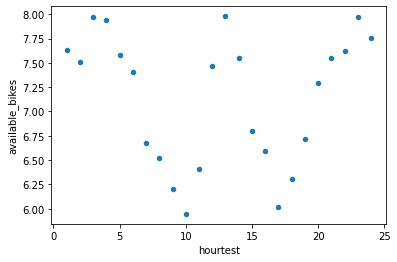

In [7]:
eoinhourplot=eoindf2.groupby('hour').mean()
eoinhourplot['hourtest'] = eoinhourplot.index

#hourplot['hourtest'] = hourplot.index

eoinhourplot[['available_bikes', 'hourtest']].plot(kind='scatter', x='hourtest',y='available_bikes' )

In [8]:
#lin reg attempt

KeyError: "None of [Index(['Size', 'Floor', 'BroadbandRate'], dtype='object')] are in the [columns]"

In [11]:

X = eoindf2[['day', 'hour', 'wind_speed', 'weather_main', 'main_temp']]
y = eoindf2.available_bikes

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)

### Training a model




Descriptive features in X:
        day  hour  wind_speed  weather_main  main_temp
0        1    24        3.09             2     280.66
1        1    24        3.09             2     280.75
2        2     1        3.60             2     280.50
3        2    11        3.09             2     282.58
4        2    11        3.09             2     282.57
...    ...   ...         ...           ...        ...
10762    3    15        4.63             2     283.90
10763    3    15        4.63             2     283.80
10764    3    15        4.63             2     283.80
10765    3    16        4.63             2     284.05
10766    3    16        4.63             2     283.96

[10767 rows x 5 columns]

Target feature in y:
 0        9
1        9
2        9
3        4
4        4
        ..
10762    5
10763    5
10764    5
10765    5
10766    2
Name: available_bikes, Length: 10767, dtype: int64


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Train a model using linear regression from scikit-learn.
# By default sklearn fits an intercept.
# Use only the descriptive feature Size.
features = ['hour']
linreg = LinearRegression().fit(X[features], y)

# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 increase in RentalPrice.

# Print the estimated linear regression coefficients.
print("Features: \n", features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)



Features: 
 ['hour']
Coeficients: 
 [-0.00605488]

Intercept: 
 7.20295838464305


In [13]:
# Use only the descriptive feature Size.
features2 = ['day', 'hour', 'wind_speed', 'weather_main', 'main_temp' ]
linreg = LinearRegression().fit(X[features2], y)

print("Features: \n", features2)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)



Features: 
 ['day', 'hour', 'wind_speed', 'weather_main', 'main_temp']
Coeficients: 
 [-0.08227854  0.02608544 -0.11277934  0.04330595 -0.22337256]

Intercept: 
 70.29596671679018


In [14]:
### Testing the model
#Using the trained model to predict the target feature RentalPrice, given the descriptive feature Size.

# Predicted scores for each example. 
linreg_predictions = linreg.predict(X[['hour']])

#print("Predicted scores:", predicted_scores)
print("\nPrediction for first example (Size, RentalPrice, PredictedScore): ", X['hour'].values[0], y.values[0], linreg_predictions[0])
actual_vs_predicted = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
actual_vs_predicted.head(50)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [15]:
eoindf2.head(50)

,number,available_bike_stands,available_bikes,weather_id,weather_main,main_temp,main_feels_like,main_temp_max,main_temp_min,main_pressure,wind_speed,test1,hour,day
0,2,11,9,803,2,280.66,277.47,280.93,280.15,1019,3.09,2021-03-08 23:15:00,24,1
1,2,11,9,803,2,280.75,277.58,281.48,280.15,1019,3.09,2021-03-08 23:30:00,24,1
2,2,11,9,803,2,280.50,276.92,280.93,279.82,1019,3.60,2021-03-09 00:45:00,1,2
3,2,16,4,803,2,282.58,279.57,283.71,280.93,1016,3.09,2021-03-09 10:00:00,11,2
4,2,16,4,803,2,282.57,279.56,283.71,280.93,1016,3.09,2021-03-09 10:00:00,11,2
5,2,16,4,803,2,282.64,279.64,283.71,280.93,1016,3.09,2021-03-09 10:15:00,11,2
6,2,16,4,803,2,282.64,279.64,283.71,280.93,1016,3.09,2021-03-09 10:15:00,11,2
7,2,16,4,803,2,282.72,279.02,283.71,280.93,1015,4.12,2021-03-09 10:15:00,11,2
8,2,16,4,803,2,282.72,279.02,283.71,280.93,1015,4.12,2021-03-09 10:15:00,11,2
9,2,16,4,803,2,282.81,279.13,283.71,280.93,1015,4.12,2021-03-09 10:15:00,11,2


In [16]:
#X = eoindf2[features2]
#y = eoindf2.RentalPrice

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
        day  hour  wind_speed  weather_main  main_temp
0        1    24        3.09             2     280.66
1        1    24        3.09             2     280.75
2        2     1        3.60             2     280.50
3        2    11        3.09             2     282.58
4        2    11        3.09             2     282.57
...    ...   ...         ...           ...        ...
10762    3    15        4.63             2     283.90
10763    3    15        4.63             2     283.80
10764    3    15        4.63             2     283.80
10765    3    16        4.63             2     284.05
10766    3    16        4.63             2     283.96

[10767 rows x 5 columns]

Target feature in y:
 0        9
1        9
2        9
3        4
4        4
        ..
10762    5
10763    5
10764    5
10765    5
10766    2
Name: available_bikes, Length: 10767, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
       day  hour  wind_speed  weather_main  main_temp  available_bikes
186     2    22       10.80             2     282.64                5
2747    3    10        3.60             2     281.48                3
5040    1    21        5.66             2     285.08                2
2253    1    24        5.14             2     283.76               14
4565    6    15        8.23             2     282.84                8
...   ...   ...         ...           ...        ...              ...
9225    6     8        4.12             2     272.31               13
4859    1     4        8.23             2     286.34               13
3264    3     3        3.60             2     279.54                4
9845    1     2        3.09             2     277.27               12
2732    3     9        3.09             1     278.56                3

[7536 rows x 6 columns]

Test data:
        day  hour  wind_speed  weather_main  main_temp  available_bikes
5742     3    18        3.60       

In [18]:
y_train

186      5
2747     3
5040     2
2253    14
4565     8
        ..
9225    13
4859    13
3264     4
9845    12
2732     3
Name: available_bikes, Length: 7536, dtype: int64

In [19]:
rfc = RandomForestRegressor(random_state=0)
rfc = rfc.fit(X_train,y_train)
score = rfc.score(X_test,y_test)
# score = cross_val_score(rfc,Xtest,Ytest,cv=10)
score

0.9580638901468433

In [20]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [21]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))

In [22]:
test_prediction = rfc.predict(X_test)
printMetrics(y_test, test_prediction)


MAE:  0.4811731737224689
RMSE:  0.9261691720562789
R2:  0.9580638901468433


In [25]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index = features2, columns=['Feature importance']).sort_values('Feature importance', ascending=False)
feature_importances


,Feature importance
main_temp,0.359292
hour,0.227892
day,0.217890
wind_speed,0.166729
weather_main,0.028197


In [47]:
X_test

,day,hour,wind_speed,weather_main
2948,2,7,4.12,2
2707,3,7,3.60,1
6353,5,11,6.69,2
1281,6,3,7.72,2
5961,4,8,7.20,2
...,...,...,...,...
333,3,10,3.09,2
3498,3,17,8.23,2
690,4,11,7.20,2
3335,3,8,3.09,2


In [51]:
#linreg_predictions = linreg.predict(X[['hour']])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Predicted scores:", predicted_scores)
print("\nPrediction for first example", X_test['hour'].values[0], y_test.values[0], test_prediction[0])
actual_vs_predicted = pd.concat([y_test, pd.DataFrame(test_prediction, columns=['Predicted'], index=y_test.index)], axis=1)
actual_vs_predicted.head(50)


Prediction for first example 7 7 5.291282051282052


,available_bikes,Predicted
2948,7,5.291282
2707,4,4.000000
6353,3,2.666113
1281,2,2.000000
5961,11,7.235294
5748,10,10.251310
454,6,5.552172
1014,4,5.904545
7139,1,1.855588
451,5,3.569910
